In [1]:
#STEP 1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

# load the dataset into the dataframe df
df = pd.read_excel('../Data/WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [2]:
#STEP 2
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#STEP 3
df['Churn'] = df['Churn'].apply(lambda x:1 if x == 'Yes' else 0)

In [5]:
df['Churn'].mean()

0.2653698707936959

In [6]:
#STEP 4
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan).astype(float)

In [7]:
df.shape

(7043, 21)

In [8]:
df.dropna().shape

(7032, 21)

In [9]:
df = df.dropna()

In [10]:
#STEP 5
df2 = df[['tenure','MonthlyCharges','TotalCharges']].describe()
df2

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [11]:
df["MonthlyCharges"] = np.log(df['MonthlyCharges'])
df['TotalCharges'] = np.log(df['TotalCharges'])

In [12]:
df[['tenure','MonthlyCharges','TotalCharges']].head(10)

,tenure,MonthlyCharges,TotalCharges
0,1,3.396185,3.396185
1,34,4.042174,7.544068
2,2,3.986202,4.683519
3,45,3.744787,7.517928
4,2,4.258446,5.021575
5,8,4.601664,6.709914
6,22,4.489759,7.575277
7,10,3.392829,5.710096
8,28,4.652054,8.021601
9,62,4.028027,8.157069


In [13]:
#STEP 6
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()

df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean())/df['TotalCharges'].std()

df['tenure'] = (df['tenure'] - df['tenure'].mean())/df['tenure'].std()

In [14]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.028756e-16,4.527016e-14,8.460746e-15
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.280157e+00,-1.979396e+00,-3.184383e+00
25%,-9.542285e-01,-6.738276e-01,-4.440479e-01
50%,-1.394072e-01,4.275961e-01,2.807655e-01
75%,9.198605e-01,7.805602e-01,7.762461e-01
max,1.612459e+00,1.159794e+00,1.143345e+00


In [15]:
df2 = df.copy()
scaler = StandardScaler()
df2['MonthlyCharges'] = scaler.fit_transform(df[['MonthlyCharges']])
df2['TotalCharges'] = scaler.fit_transform(df[['TotalCharges']])
df2['tenure'] = scaler.fit_transform(df[['tenure']])

In [16]:
df2[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-6.198429e-17,-4.363846e-17,1.521978e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.280248e+00,-1.979536e+00,-3.184609e+00
25%,-9.542963e-01,-6.738755e-01,-4.440795e-01
50%,-1.394171e-01,4.276265e-01,2.807854e-01
75%,9.199259e-01,7.806157e-01,7.763013e-01
max,1.612573e+00,1.159876e+00,1.143426e+00


In [17]:
df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [18]:
continuous_vars = list(df.describe().columns)
continuous_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [19]:
#STEP 7
for col in list(df.columns):
    print(col, df[col].nunique())

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


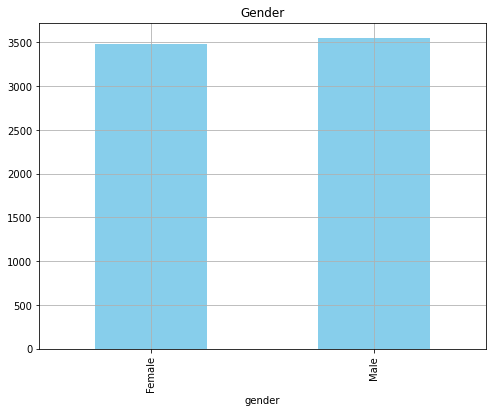

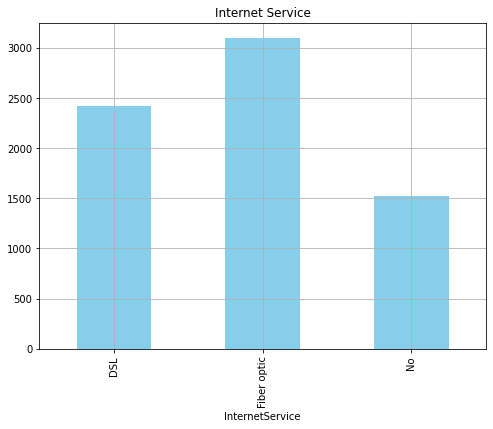

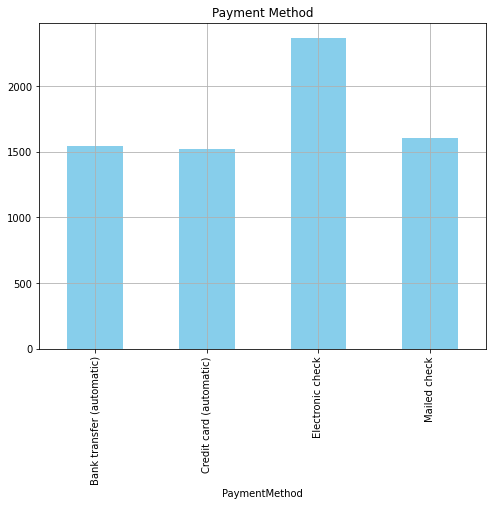

In [20]:
df.groupby('gender').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Gender'
)
plt.show()

df.groupby('InternetService').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Internet Service'
)
plt.show()

df.groupby('PaymentMethod').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Payment Method'
)
plt.show()

In [21]:
#STEP 8
dummy_cols = []
sample_set = df[['tenure','MonthlyCharges','TotalCharges','Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure','MonthlyCharges','TotalCharges','Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)

In [22]:
#STEP 9
target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x !=target_var]

In [23]:
sample_set.transpose()

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
tenure,-1.280157,0.064298,-1.239416,0.512450,-1.239416,-0.994970,-0.424595,-0.913487,-0.180148,1.205048,...,0.227262,1.408753,-0.546818,-0.832005,1.612459,-0.343113,1.612459,-0.872746,-1.157934,1.368012
MonthlyCharges,-0.992189,0.106181,0.018228,-0.375844,0.434951,0.923890,0.768600,-0.998424,0.992586,0.084066,...,0.409543,0.968391,0.591771,0.203650,-1.666952,0.698721,0.971691,-1.007829,0.510061,1.003530
TotalCharges,-2.623238,0.437242,-1.390788,0.423932,-1.123535,-0.012086,0.453073,-0.630811,0.672600,0.736819,...,0.600863,1.043954,0.316353,-0.068978,0.288999,0.463620,1.072886,-0.539472,-0.620450,1.041315
Churn,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
genderFemale,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
genderMale,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
SeniorCitizen0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
SeniorCitizen1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
PartnerNo,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
PartnerYes,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [24]:
#STEP 10
model = Sequential()
model.add(Dense(16,input_dim=len(features),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [25]:
#STEP 11
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
#STEP 12
X_train, X_test, y_train, y_test = train_test_split(
sample_set[features],
sample_set[target_var],
test_size=0.3
)

In [27]:
#STEP 13
model.fit(X_train,y_train,epochs=150,batch_size=100)

Epoch 1/150
50/50 [==============================] - 0s 1ms/step - loss: 0.5849 - accuracy: 0.6906
Epoch 2/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7838
Epoch 3/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.7987
Epoch 4/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.7991
Epoch 5/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8027
Epoch 6/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8048
Epoch 7/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8050
Epoch 8/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8056
Epoch 9/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8064
Epoch 10/150
50/50 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8050
Epoch 11/

50/50 [==============================] - 0s 1ms/step - loss: 0.3831 - accuracy: 0.8155
Epoch 83/150
50/50 [==============================] - 0s 983us/step - loss: 0.3830 - accuracy: 0.8161
Epoch 84/150
50/50 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8153
Epoch 85/150
50/50 [==============================] - 0s 980us/step - loss: 0.3827 - accuracy: 0.8163
Epoch 86/150
50/50 [==============================] - 0s 991us/step - loss: 0.3824 - accuracy: 0.8163
Epoch 87/150
50/50 [==============================] - 0s 964us/step - loss: 0.3819 - accuracy: 0.8157
Epoch 88/150
50/50 [==============================] - 0s 954us/step - loss: 0.3821 - accuracy: 0.8176
Epoch 89/150
50/50 [==============================] - 0s 1ms/step - loss: 0.3815 - accuracy: 0.8141
Epoch 90/150
50/50 [==============================] - 0s 1ms/step - loss: 0.3818 - accuracy: 0.8174
Epoch 91/150
50/50 [==============================] - 0s 1ms/step - loss: 0.3812 - accuracy: 0.8149
Epo

In [28]:
y_test

345     0
4373    0
1828    0
6920    0
1543    1
       ..
6566    0
6929    0
118     0
1696    1
2851    0
Name: Churn, Length: 2110, dtype: int64

In [29]:
in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]

In [30]:
#STEP 14
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

print('\n')

print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

print('\n')

print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8265
Out-of-Sample Accuracy: 0.7943


In-Sample Precision: 0.7373
Out-of-Sample Precision: 0.6533


In-Sample Recall: 0.5485
Out-of-Sample Recall: 0.4463


In [31]:
#STEP 15
in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]

in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8846
Out-Sample AUC: 0.8354


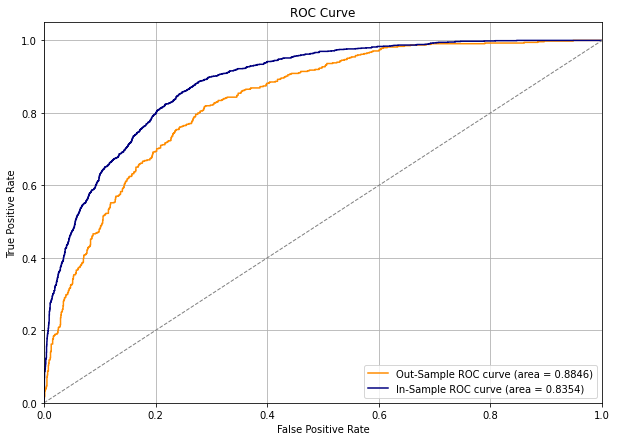

In [32]:
#STEP 16
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()